In [1]:
# Importamos las bibliotecas
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

from scipy.integrate import odeint

Ejercicio 1:

Resuelva la ecuación diferencial del oscilador de Van der Pol

$$\begin{equation*}
\frac{d^2 x}{d t^2} - \mu (1 - x^2) \frac{dx}{dt } + x = 0
\end{equation*}$$
donde $x$ es la posición y $\mu$ es un parámetro de la parte no lineal.

Resuelva el caso para $\mu = 0, 1, 2, 3, 4$ y grafique las soluciones para un tiempo de integración de t = [0, 50]

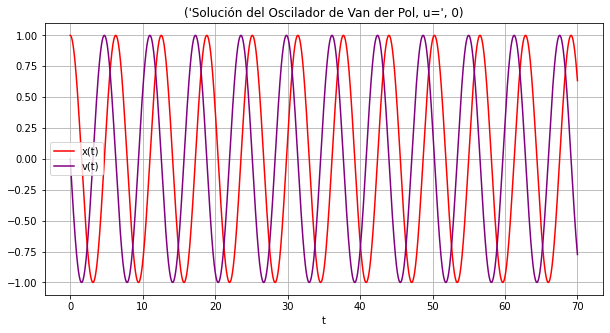

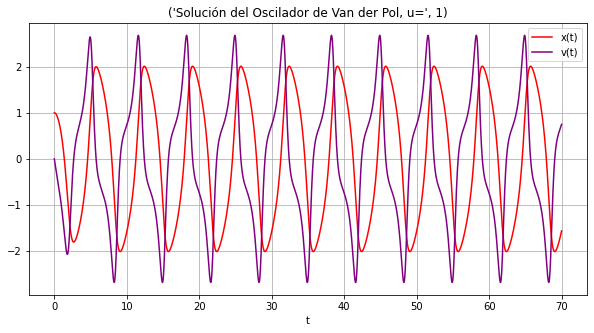

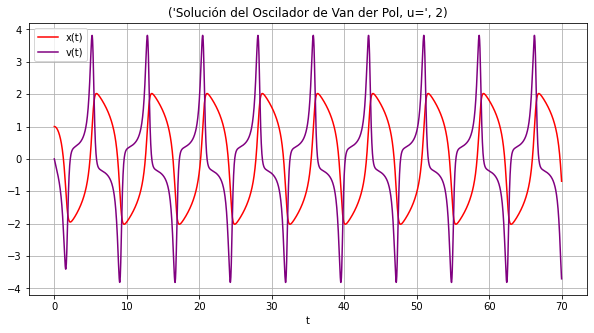

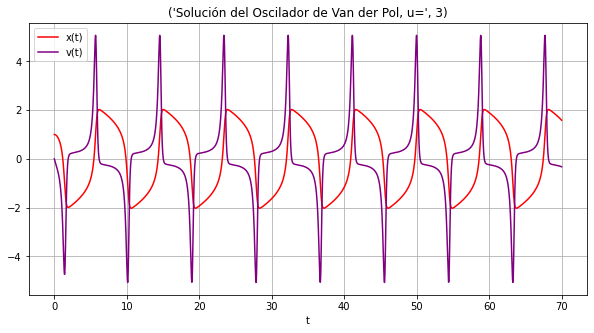

In [3]:
# Empezamos definiendo la funcion para el oscilador de Van der Pol
def oscilador(y,t,mu):
        x, v = y
        dydt = [v, mu*(1 - x**2)*v - x]
        return dydt

# Tendremos variales con las cuales estaran relacionadas las condicoens iniciales 

tt = 0.0

qw = 1.0

# Ingresamos cuales seran las condiciones iniciales para el trabajo
y0 = [qw, tt]

# Tendremos un intervalo de [0,50]
# Tomaremos el numero de puntos que considereremos 

# Para la parte de t definimos un espaciamiento de 2300

t = np.linspace(0, 70, 3300)

# Usamos el método de integración de scipy.integrate.odeint

for u in range(4):
  sol=odeint(oscilador, y0, t, args=(u,))
  y1=sol[:,0] # x(t)
  y2=sol[:,1] # v(v)
  plt.figure(figsize=(10,5))
  plt.plot(t, y1, 'b', label='x(t)', color = "r")
  plt.plot(t, y2, 'g', label='v(t)', color = "purple")
  plt.legend(loc='best')
  plt.title(('Solución del Oscilador de Van der Pol, u=',u,))
  plt.xlabel('t')
  plt.grid()
  plt.show()


Ejercicio 2:

Siguiendo con el ejemplo anterior del oscilador de Van de Pol, reproduce la gráfica del plano fase ($\theta, \omega$) que aparece en la Wikipedia para distintos valores de $\mu$ y se reproduce abajo.

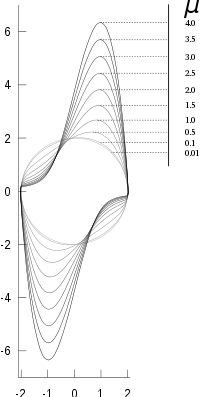

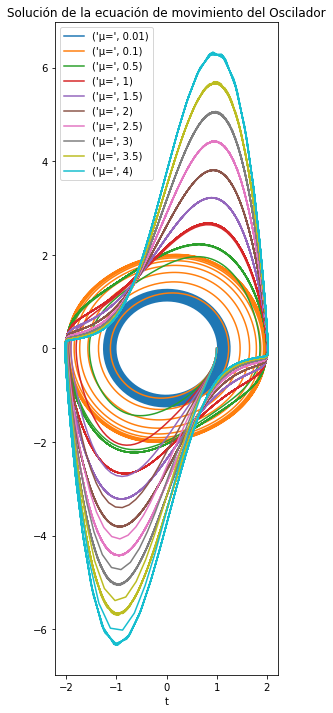

In [6]:
# Empezaremos definiendo la función la cual dependera de t and y 
# F(t,y)
def Oscilador(y,t,u):
        x, v = y
        dydt = [v, u*(1 - x**2)*v - x]
        return dydt
        
#Definimos las condiciones iniciales 
#tiempo inicial es 0.0
t_0 = 0.0
#velocidad incial es [1.0,0.0]
v_0 = [qw, tt]

# Tendremos un intervalo de [0,50] 
# Nosotros tambien tomaremos un espacioado de 1500
t = np.linspace(0, 70, 1750)

plt.figure(figsize=(4,12))

#Nuestros valores de μ de interés son obtenidos a partir de la gráfica mostrada anteriormente
for u in [0.01,0.1,0.5,1,1.5,2,2.5,3,3.5,4]:
  y=odeint(Oscilador, v_0, t, args=(u,))
  #x(t)
  y1=y[:,0] 
  #v(t)
  y2=y[:,1]
  plt.plot(y1, y2, label=('μ=',u))
  plt.legend(loc='best')
  plt.title(('Solución de la ecuación de movimiento del Oscilador'))
  plt.xlabel('t')
  plt.grid()
plt.show()


Ejercicios 3:

Encuentre las soluciones de las siguientes Ecuaciones Diferenciales Ordinarias, utilizando los siguientes métodos:

Método de Euler
Método de Runge-Kutta RK4
Función scipy.integrate.odeint ó scipy.integrate-solve_ivp

Ejercicio 3.1:

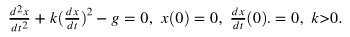

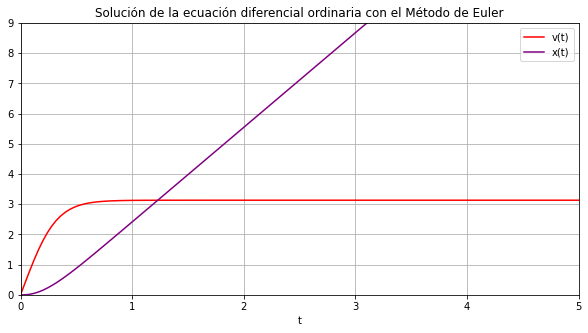

In [14]:
# Empezamos definiendo los tiempos de integracion

t = np.linspace(0, 70, 1750)

# Tomaremos el valor de la gravedad como g 
g = 9.81

# Empezamos definiendo nuestras condiones iniciales las cuales seran:
t0 = 0.0

# Tomaremos el valor arbitrario de k 
k = 1

# Definimos nuestra funcion la cual sera f = lamda y t = g-k*v**2
f =lambda v,t: g-k*v**2

# Tendremos el vector inicial 
v = np.zeros(len(t))
v[0] = 0

# Definiremos el vector posicion el cual nos dara el inicio en 0
x = np.zeros(len(t))
x[0] = 0
    
for n in range(0,len(t)-1):
  v[n+1] = v[n] + f(v[n],t[n])*(t[n+1] - t[n])
  x[n+1] = x[n] + v[n]*(t[n+1] - t[n])

plt.figure(figsize=(10,5))
plt.plot(t,v,'r', t,x,'purple')
plt.legend(['v(t)', 'x(t)'])
plt.title('Solución de la ecuación diferencial ordinaria con el Método de Euler')
plt.axis([0,5,0,9])
plt.grid()
plt.xlabel('t')
plt.show()

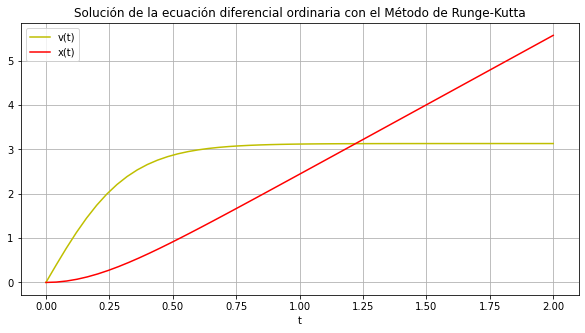

In [18]:

# Comenzando con el metodo de Runge-Kutta
def RK(f, x0, y0, h):
    k0 = f(x0, y0)
    k1 = f(x0 + h/2, y0 + h/2 * k0)
    k2 = f(x0 + h/2, y0 + h/2 * k1)
    k3 = f(x0 + h, y0 + h * k2)

#Donde para las ecuaciones diferenciales ordinarias tenemos que:
    k = 1/6 * (k0 + 2.0*k1 + 2.0*k2 + k3)
    x1 = x0 + h
    y1 = y0 + h * k
    return x1, y1

# Definimos el Paso de integración h
a = 0.0
b = 2.0 

# Podremos definir nuestras condiciones iniciales
t0 = 0.0
x0 = 0.0
v0 = 0.0

#Con una cantidad de puntos:
hhh = 50
h = (b-a)/hhh

# Definimos el valor para el tiempo 
# El cual comenzara en 0.0
t= 0.0

# Definimos el valor de la velocidad
# El cual comenzara en 0.0
v= 0.0

#Resolución de la primera ecuacióon
f = lambda t,v: -k*v**2 + g 
t_values = [0]
v_values = [0]

for _ in range(hhh):
  t, v = RK(f, t, v, h)

  t_values.append(t)
  v_values.append(v)

def ED(t,y,k,g):
      dvdt = [y[1], -k*(y[1])**2 + g]
      return dvdt 
#Definimos nuestras condiciones iniciales
rae = [0.0, 0.0]

# Podremos definir la variable del tiempo la cual sera la de integracion 
t = np.linspace(a,b,arv)


# Tendremos R donde integramos todos los resultados y variables incluidas 
R = solve_ivp(lambda t, y, mu: ED(t, y, k, g),(a,b), y0=rae, method='RK45', t_eval=t, args=(u,))
x=R.y[0]

#Graficamos la solución
plt.figure(figsize=(10,5))
plt.plot(t_values,v_values,'g', label='v(t)', color = "y")
plt.plot(t,x,'g', label='x(t)', color = "r")
plt.legend(loc='best')
plt.grid()
plt.title('Solución de la ecuación diferencial ordinaria con el Método de Runge-Kutta')
plt.xlabel('t')
plt.show()

Ejercicio 3.2:

$$\begin{equation*}
\frac{d^2 y}{d x^2} + \frac{2}{x} \frac{dy}{dx} + y^5 =0, \ y(0) = 1, \ \frac{dy}{dx}(0)=0. 
\end{equation*}$$

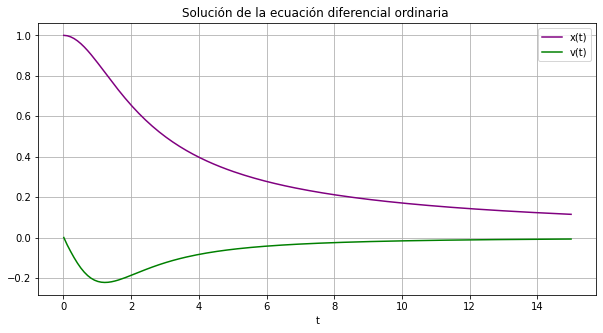

In [24]:
#HACEMOS USO DE LA FUNCIÓN scipy.integrate.odeint

#Definimos la ecuación:
def F(a, x):
        y, v = a
        dadx = [v, -(2/x)*v -y**5]
        return dadx
#Condiciones iniciales
ggg = [1.0, 0.0]
#Definimos la x de integración
x = np.linspace(0.01, 15, 150)

# En la variable R tendremos guardadas todas las variables y las funciones 
R = odeint(F, afas, x,atol=abserr, rtol=relerr)

# La solución regresa ambas x(t) y v(t)
y1=R[:,0]
y2=R[:,1]

# Graficamos los resultados
plt.figure(figsize=(10,5))
plt.plot(x, y1, 'g', label='x(t)', color = "purple")
plt.plot(x, y2, 'y', label='v(t)', color = "g")
plt.legend(loc='best')
plt.title('Solución de la ecuación diferencial ordinaria ')
plt.xlabel('t')
plt.grid()
plt.show()

Ejercicio 3.3:

$$\begin{equation*}
\frac{d^3 y}{d x^3} = (x-1)^2 + y^2 + \frac{dy}{dx} -2, \ y(0)=1, \ y'(0)=0, \ y''(0)=2.
\end{equation*}$$


In [29]:
# Función scipy.integrate.odeint

# Definimos la ecuacion a trabajar 
def FO(b, x):
        y, v, a = b
        dbdx = [v, a, (x-1)**2 + y**2 + v - 2]
        return dbdx
 

 # Definimos el gg
 
gg = [1.0, 0.0, 2.0]

#Definimos x 
x = np.linspace(0.0, 2.0, 50)

# En la variable de R guardaremos los resultados ya obtenidos 
# La cual de igual forma representara una solucion 
R = odeint(FO, rv, x)

#La solución regresa ambas x(t) y v(t)
y1=R[:,0]
y2=R[:,1]
y3=R[:,2]



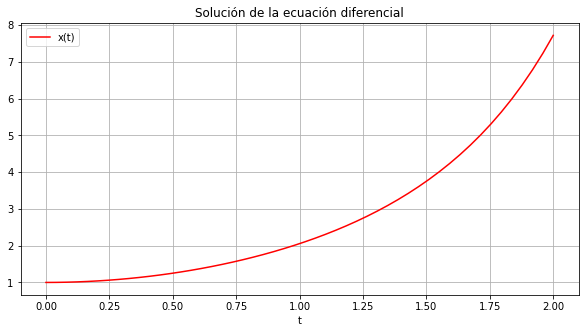

In [32]:
# Graficamos los resultados
plt.figure(figsize=(10,5))
plt.plot(x, y1, label='x(t)', color = "r")
plt.legend(loc='best')
plt.title('Solución de la ecuación diferencial')
plt.xlabel('t')
plt.grid()
plt.show()

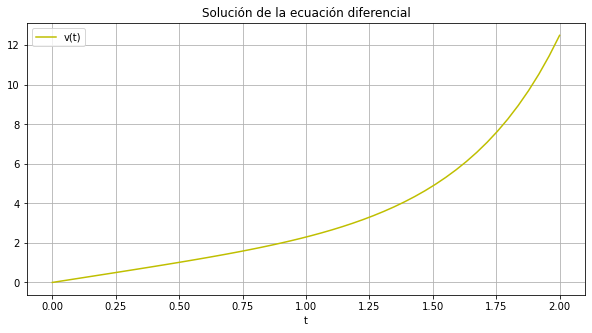

In [33]:
# Graficamos los resultados
plt.figure(figsize=(10,5))

plt.plot(x, y2, label='v(t)', color = "y")

plt.legend(loc='best')
plt.title('Solución de la ecuación diferencial')
plt.xlabel('t')
plt.grid()
plt.show()

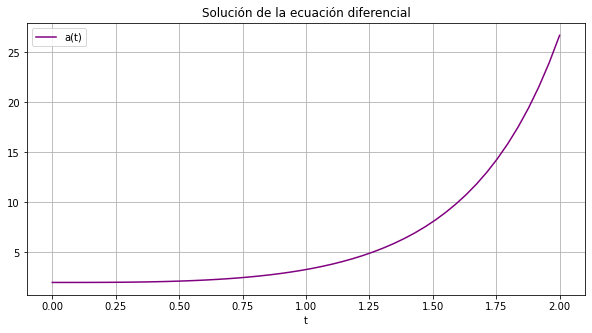

In [34]:
# Graficamos los resultados
plt.figure(figsize=(10,5))

plt.plot(x, y3, label='a(t)', color = "purple")
plt.legend(loc='best')
plt.title('Solución de la ecuación diferencial')
plt.xlabel('t')
plt.grid()
plt.show()

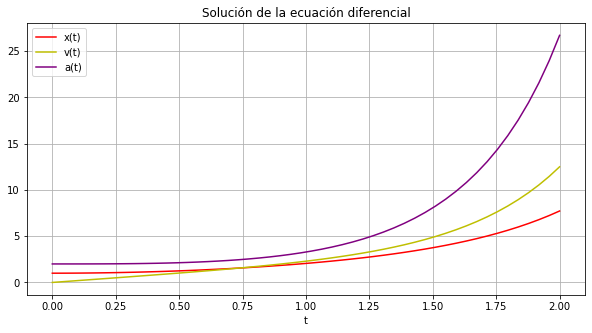

In [35]:
# Graficamos los resultados
plt.figure(figsize=(10,5))
plt.plot(x, y1, label='x(t)', color = "r")
plt.plot(x, y2, label='v(t)', color = "y")
plt.plot(x, y3, label='a(t)', color = "purple")
plt.legend(loc='best')
plt.title('Solución de la ecuación diferencial')
plt.xlabel('t')
plt.grid()
plt.show()